In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [5]:
#We will combine train and test data for better Analysis
train['source']='train'
test['source']='test'
test['SalePrice']=0

#Concatenating the data in df variable
df=pd.concat([train,test],sort=False,ignore_index=True)

In [6]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN    NaN         NaN       0      2   2007   
1         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   2007   
2         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   2007   
3         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      1   2010   
4         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   2009   

  SaleType  SaleCondition  SalePrice  source  
0       WD         Normal     128000   train  
1       WD         Normal     268000   train  
2       WD         Normal     269790   train  
3      COD         Normal     190000   train  
4       WD         Normal     215000   train  

[5 rows x 82 columns]

In [7]:
pd.set_option('display.max_rows', 500)

In [8]:
df.shape

(1460, 82)

Dataframe have total 1460 rows and 82 columns

In [9]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

There is one identifier columns present

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are lot of null values present in some of the columns, 44 columns are of object type

In [11]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  145181.604795  
std      40.177307    496.123024     2.703626     1.328095  101382.116539  
min       0.000000      0.000000     1.000000  2006.000000       0.000000  
25%       0.000000      0.000000     5.000000  2007.000000   94937.500000  
50%       0.000000      0.000000     6.000000  2008.000000  144076.000000  
75%       0.000000      0.000000     8.000000  2009.000000  196250.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

A lot of null values are present in some of the columns, There is high variation in a lot of features.

# EDA

Minimum 0
Maximum 755000


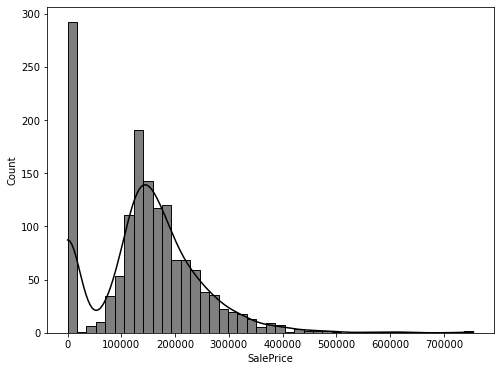

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(df['SalePrice'],kde=True,color='k')
print('Minimum',df['SalePrice'].min())
print('Maximum',df['SalePrice'].max())

Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness.

In [13]:
#Separating categorical and continuous features
cat=[i for i in df.columns if df[i].nunique()<40 and i!='source' ]
cont=[i for i in df.columns if df[i].nunique()>39]

### Continuous Features

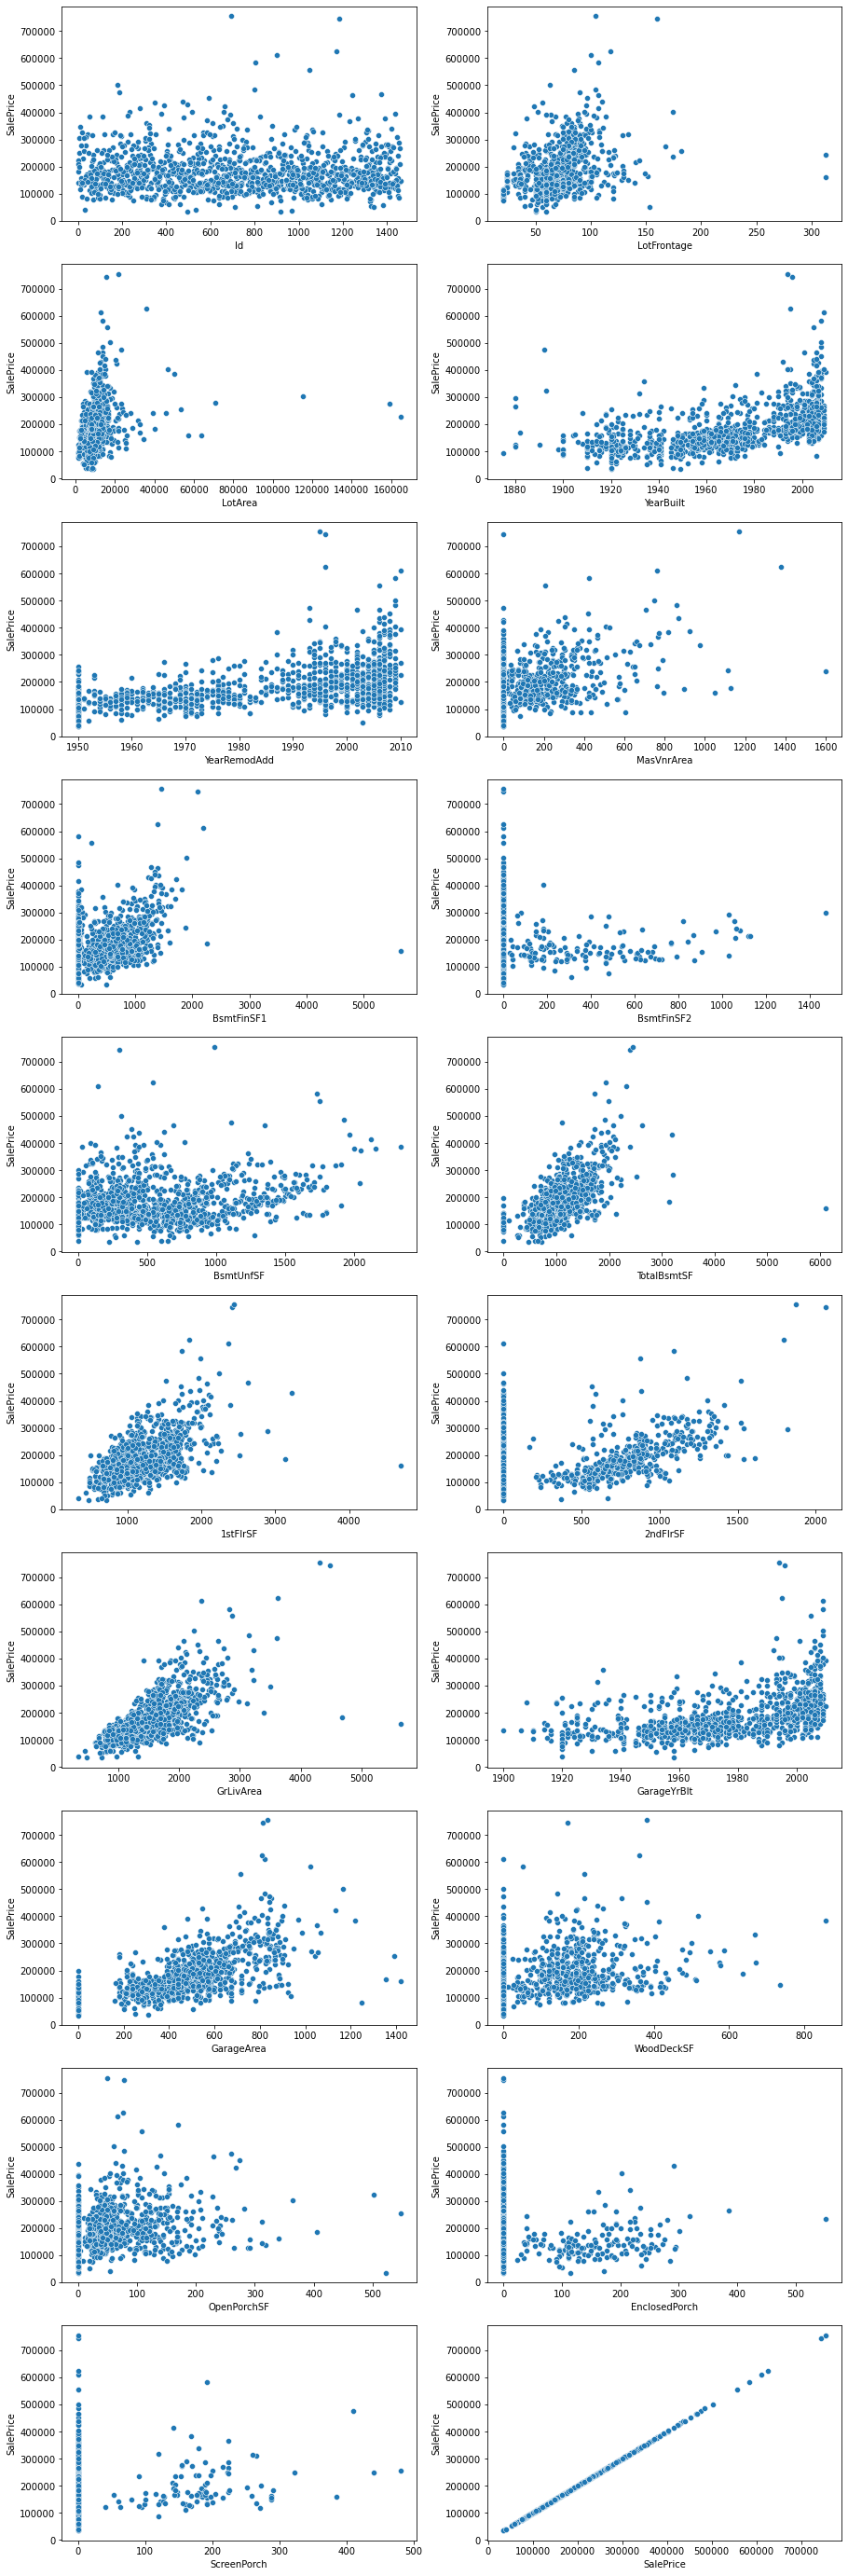

In [14]:
#Sale Price vs Continuous features
fig,ax=plt.subplots(10,2,figsize=(15,50))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.scatterplot(x=n,y='SalePrice',data=train,ax=ax[r,c])
    #if n=='Neighborhood' or n=='Exterior1st' or n=='Exterior2nd' or n=='':
        #graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
    #else:
        #graph.set_xticklabels(graph.get_xticklabels(),rotation = 45)
    #if n!='Education_num':
        #graph.set(xlabel=None)
    c+=1

'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

### Categorical Features

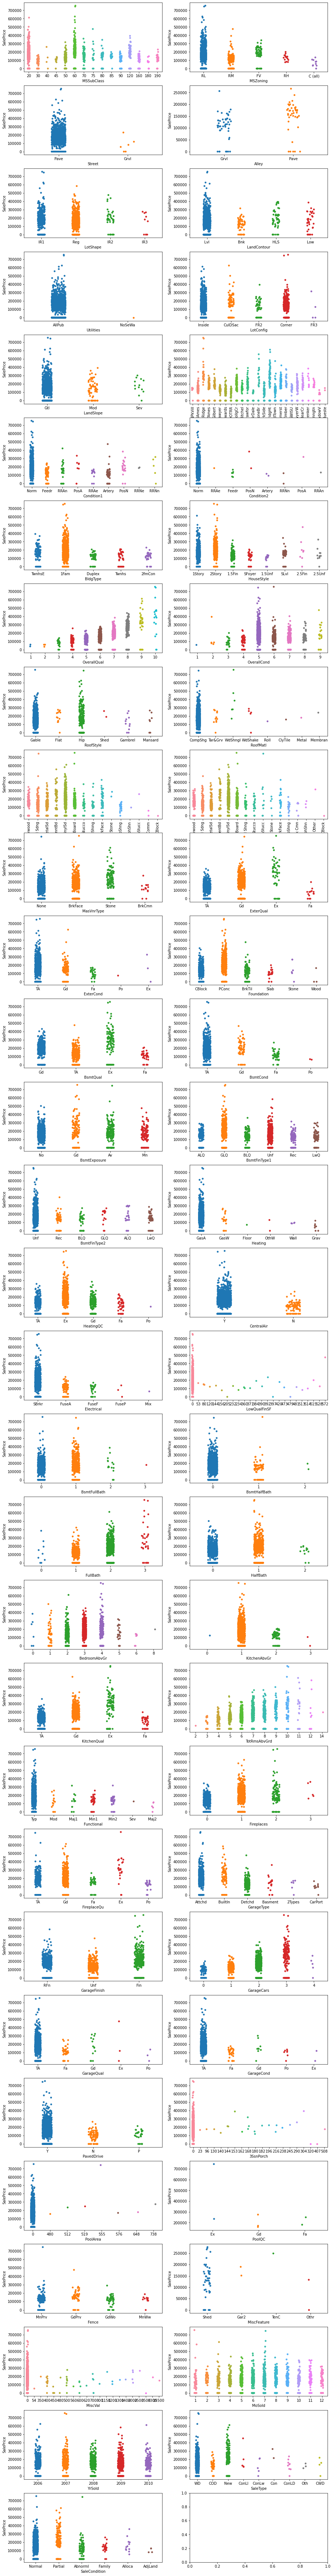

In [15]:
#Sale Price vs Categorical features
fig,ax=plt.subplots(31,2,figsize=(15,130))
r=0
c=0
for i,n in enumerate(cat):
    if i%2==0 and i>0:
        r+=1
        c=0
    graph=sns.stripplot(x=n,y='SalePrice',data=df,ax=ax[r,c])
    if n=='Neighborhood' or n=='Exterior1st' or n=='Exterior2nd' or n=='':
        graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
    #else:
        #graph.set_xticklabels(graph.get_xticklabels(),rotation = 45)
    #if n!='Education_num':
        #graph.set(xlabel=None)
    c+=1

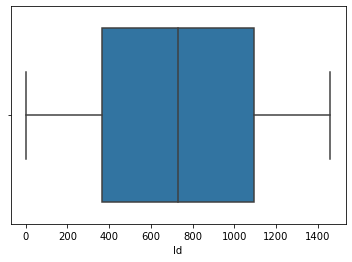

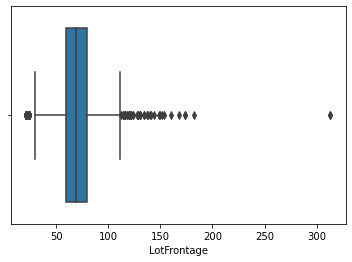

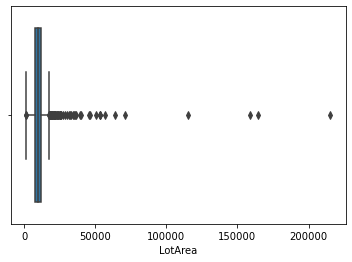

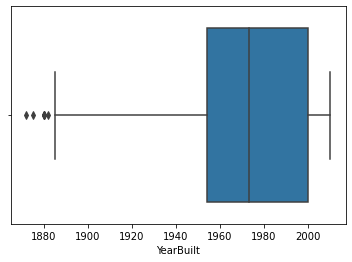

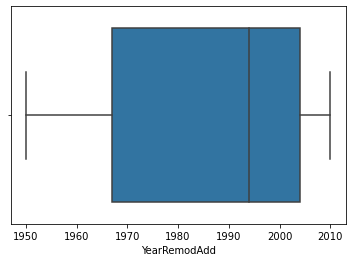

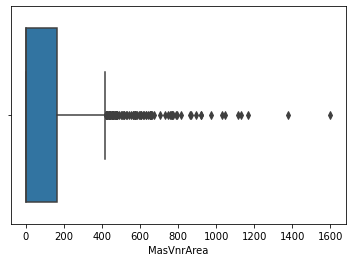

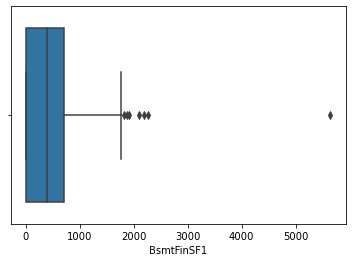

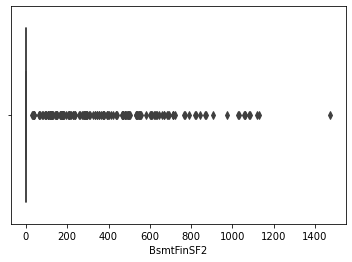

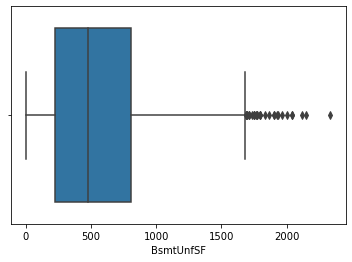

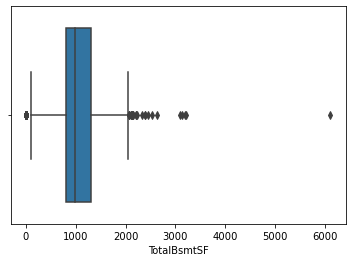

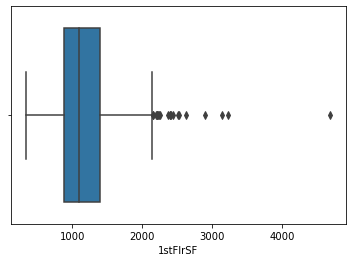

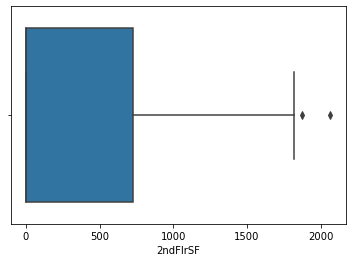

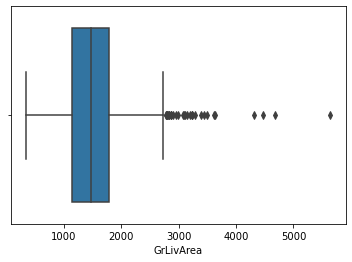

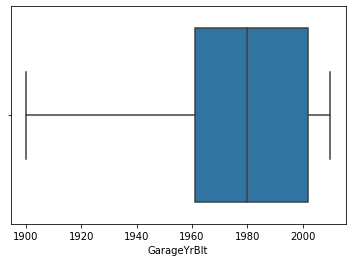

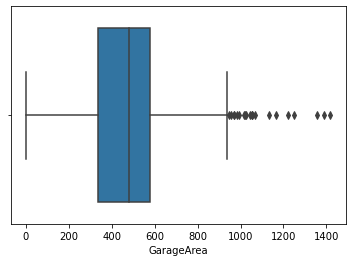

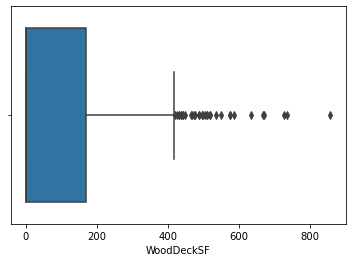

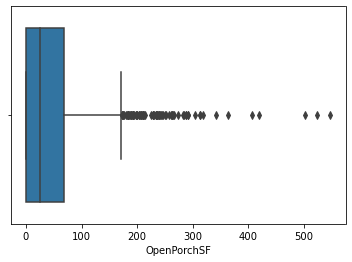

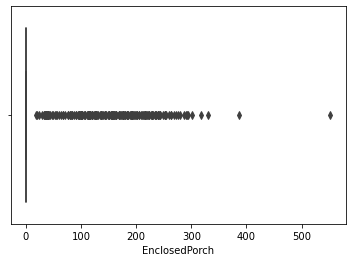

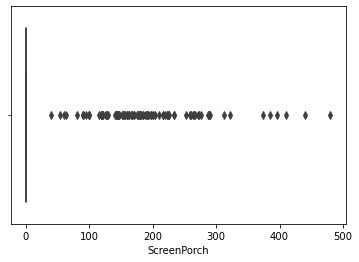

<Figure size 432x288 with 0 Axes>

In [16]:
for i in cont:
    if i!='SalePrice':
        sns.boxplot(df[i])
        plt.figure()
        

There are a number of outliers in a number of columns which we will take care in the preprocessing pipeline phase

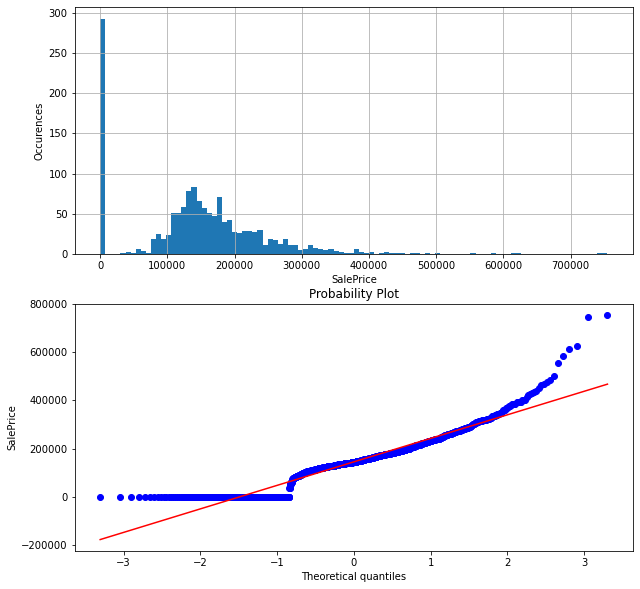

In [17]:
from scipy import stats
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
df['SalePrice'].hist(bins=100, ax=ax1)
ax1.set_ylabel('Occurences')
ax1.set_xlabel('SalePrice')

stats.probplot(df['SalePrice'], dist=stats.norm, plot=ax2)
ax2.set_ylabel('SalePrice')
plt.show() 

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

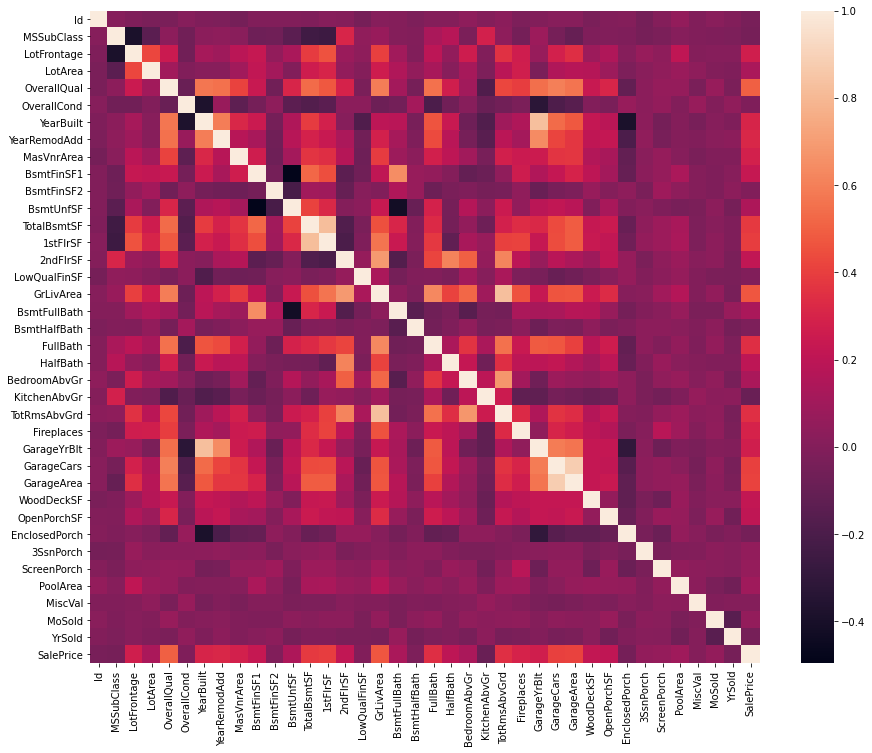

In [18]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr())

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

# Pre-processing Pipeline

In [19]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN    NaN         NaN       0      2   2007   
1         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   2007   
2         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   2007   
3         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      1   2010   
4         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   2009   

  SaleType  SaleCondition  SalePrice  source  
0       WD         Normal     128000   train  
1       WD         Normal     268000   train  
2       WD         Normal     269790   train  
3      COD         Normal     190000   train  
4       WD         Normal     215000   train  

[5 rows x 82 columns]

In [20]:
#dropping identifier columns
df.drop('Id',axis=1,inplace=True)

##### Missing Values

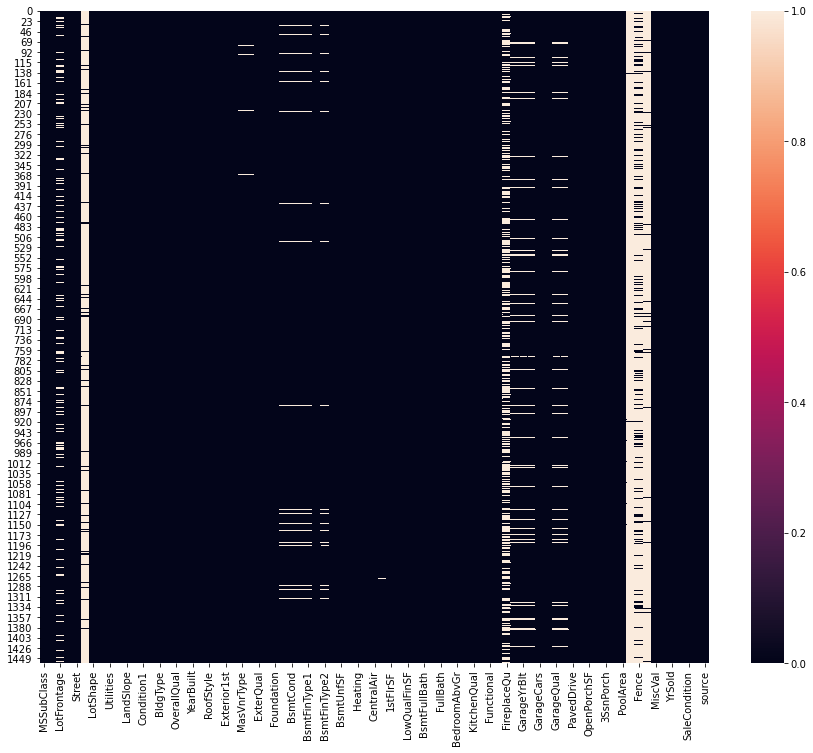

In [21]:
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull())

As we have seen in our EDA phase a number of missing data is present

In [23]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,df[i].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


##### For features having missing value smaller than 100 -> I'll fill numeric features with the corresponding median & categorical features with the corresponding most frequent values.For features having missing value larger than 1000 -> Removing these features might be a good choice. For other features having missing value -> I'll fill them with "Null" value (b.c all the other features are object features)

In [24]:
for i in df.columns:
    if df[i].isnull().sum()!=0 and df[i].isnull().sum()<=100: #Missing Values less than 100
        if df[i].dtypes=='O': #Categorical
            df[i]=df[i].fillna(df[i].value_counts().index[0])
        else: #Numerical
            df[i]=df[i].fillna(df[i].median())
    elif df[i].isnull().sum()>100:
        df.drop(i,axis=1,inplace=True)

##### Date Features

In [25]:
# Using binned technique for "YearBuilt", "YearRemodAdd" & "YrSold"
df['YearBuilt'] = pd.qcut(df['YearBuilt'], 10, duplicates='drop')
df['YearRemodAdd'] = pd.qcut(df['YearRemodAdd'], 10, duplicates='drop')
df['YrSold'] = pd.qcut(df['YrSold'], 10, duplicates='drop')

In [26]:
from sklearn import preprocessing

In [27]:
# Encode categorical features to numeric feature
for cate_col in ['YearBuilt', 'YearRemodAdd', 'YrSold']:
    df[cate_col] = preprocessing.LabelEncoder().fit_transform(df[cate_col].values)

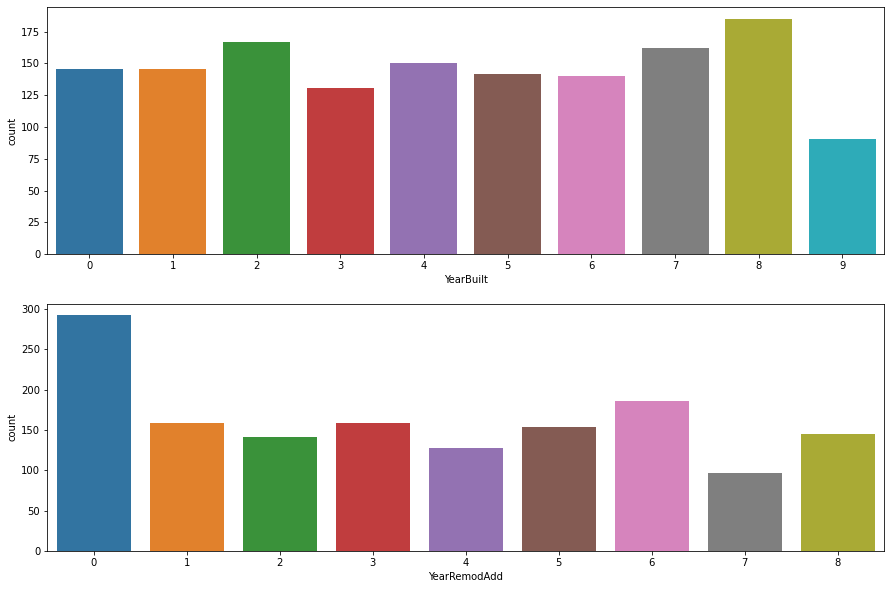

In [28]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
sns.countplot(df['YearBuilt'], ax=axs[0])
sns.countplot(df['YearRemodAdd'], ax=axs[1])
plt.show()

##### Correcting the datatype

In [29]:
# Transform numeric features that are really the categorical features
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

##### Construct new useful features


##### There are some features that we can concatunate them together to get more useful features. After constructing new features, all the recipe features might be removed b.c these features and the new one both represent the same type of infomation. Therefore, they would not be more effective to be together than to be alone

In [30]:
# Generating new features
# Total square foot
df['TotalSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF']

# Total number of bathroom
df['TotalBath'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                               df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
df['TotalBsmtbath'] = df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])

# Total square feet of porch in a house
df['TotalPorchSF'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                            df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

# Check the exist of each infrastructure (Ex: basement, bath,...) in a house
df['IsRemodel'] = df[['YearBuilt', 'YearRemodAdd']].apply(lambda x: 1 if x[0] != x[1] else 0, axis=1)
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['Has2ndFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [31]:
# Drop all the recipe features
remove_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'FullBath', 'HalfBath', 'BsmtFullBath',
              'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF']
df.drop(remove_cols, axis=1, inplace=True)

##### Encoding Categorical features

In [32]:
from sklearn.preprocessing import OrdinalEncoder
o=OrdinalEncoder()
#using ordinal encoder for independent features
for i in df.columns:
    if df[i].dtypes=='O' and i!='source':
        df[i]=o.fit_transform(df[i].values.reshape(-1,1))

##### Removing Skewness

In [33]:
#using Power transformer to remove skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [34]:
for i in df.columns:
    if df[i].nunique()>39 and df[i].skew()>0.5:
        print(i,df[i].skew())

LotArea 12.207687851233496
MasVnrArea 2.6776164510821
BsmtUnfSF 0.9202684528039037
TotalBsmtSF 1.5242545490627655
1stFlrSF 1.3767566220336365
2ndFlrSF 0.8130298163023266
GrLivArea 1.3665603560164554
SalePrice 0.7141512456588753
TotalSF 2.1639681425654547
TotalPorchSF 1.102313211663996


In [35]:
for i in df.columns:
    if df[i].nunique()>39 and df[i].skew()>0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

##### Scaling the Dataset

In [36]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()

In [37]:
#Not scaling the source and price column
for i in df.columns:
    if i=='source' or i=='SalePrice':
        pass
    else:
        df[i]=m.fit_transform(df[i].values.reshape(-1,1))

##### Separating the data frame into train and test

In [38]:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

In [39]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','SalePrice'],axis=1,inplace=True)

In [40]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [41]:
train

MSSubClass  MSZoning   LotArea  Street  LotShape  LandContour  \
0       0.000000      0.75  0.245758     1.0       0.0          1.0   
1       0.285714      0.75  0.469920     1.0       0.0          1.0   
2       0.642857      0.75  0.378918     1.0       0.0          1.0   
3       0.285714      0.75  0.411593     1.0       0.0          1.0   
4       0.285714      0.75  0.479179     1.0       0.0          1.0   
...          ...       ...       ...     ...       ...          ...   
1163    0.285714      0.75  0.376949     1.0       0.0          1.0   
1164    0.285714      0.75  0.355409     1.0       1.0          1.0   
1165    0.071429      0.75  0.102366     1.0       1.0          1.0   
1166    0.714286      0.00  0.349266     1.0       1.0          1.0   
1167    0.642857      0.75  0.334319     1.0       0.0          1.0   

      Utilities  LotConfig  LandSlope  Neighborhood  ...   TotalSF  TotalBath  \
0           0.0       1.00        0.0      0.541667  ...  0.316514        0.2   
1           0.0       1.00        0.5      0.500000  ...  0.641683        0.4   
2           0.0       0.25        0.0      0.625000  ...  0.593878        0.5   
3           0.0       1.00        0.0      0.583333  ...  0.559232        0.2   
4           0.0       0.50        0.0      0.583333  ...  0.591156        0.3   
...         ...        ...        ...           ...  ...       ...        ...   
1163        0.0       1.00        0.0      0.791667  ...  0.379126        0.0   
1164        0.0       1.00        0.0      0.291667  ...  0.328591        0.2   
1165        0.0       0.50        0.0      0.541667  ...  0.493044        0.3   
1166        0.0       1.00        0.0      0.375000  ...  0.372210        0.0   
1167        0.0       1.00        0.0      0.333333  ...  0.485061        0.5   

      TotalBsmtbath  TotalPorchSF  IsRemodel  HasPool  Has2ndFloor  HasGarage  \
0          0.000000      0.480212        1.0      0.0          0.0        1.0   
1          0.333333      0.731820        1.0      0.0          0.0        1.0   
2          0.333333      0.581947        1.0      0.0          1.0        1.0   
3          0.000000      0.375365        1.0      0.0          0.0        1.0   
4          0.166667      0.516903        0.0      0.0          0.0        1.0   
...             ...           ...        ...      ...          ...        ...   
1163       0.000000      0.000000        1.0      0.0          0.0        1.0   
1164       0.000000      0.334226        1.0      0.0          0.0        1.0   
1165       0.000000      0.318511        1.0      0.0          1.0        1.0   
1166       0.000000      0.502623        0.0      0.0          1.0        1.0   
1167       0.333333      0.445766        1.0      0.0          1.0        1.0   

      HasBsmt  HasFireplace  
0         1.0           1.0  
1         1.0           1.0  
2         1.0           1.0  
3         1.0           1.0  
4         1.0           1.0  
...       ...           ...  
1163      1.0           0.0  
1164      0.0           0.0  
1165      1.0           1.0  
1166      1.0           0.0  
1167      1.0           1.0  

[1168 rows x 73 columns]

In [42]:
test

MSSubClass  MSZoning   LotArea  Street  LotShape  LandContour  Utilities  \
0      0.285714      0.75  0.447723     1.0  0.000000     0.333333        0.0   
1      0.000000      0.75  0.276967     1.0  0.000000     1.000000        0.0   
2      0.285714      0.75  0.413020     1.0  1.000000     1.000000        0.0   
3      0.714286      0.75  0.415650     1.0  1.000000     0.000000        0.0   
4      0.642857      0.75  0.453693     1.0  0.000000     1.000000        0.0   
5      0.142857      1.00  0.072379     1.0  1.000000     1.000000        0.0   
6      0.142857      1.00  0.190772     1.0  1.000000     1.000000        0.0   
7      0.285714      0.75  0.444035     1.0  1.000000     1.000000        0.0   
8      0.857143      0.75  0.428153     1.0  1.000000     0.666667        0.0   
9      0.000000      1.00  0.228676     1.0  1.000000     1.000000        0.0   
10     0.357143      1.00  0.292900     1.0  0.000000     1.000000        0.0   
11     0.285714      0.75  0.370661     1.0  1.000000     1.000000        0.0   
12     0.285714      0.75  0.531810     1.0  1.000000     0.333333        0.0   
13     0.285714      0.75  0.627038     0.0  1.000000     1.000000        0.0   
14     0.285714      0.75  0.448669     1.0  1.000000     1.000000        0.0   
15     0.571429      0.75  0.347114     1.0  1.000000     1.000000        0.0   
16     0.285714      0.75  0.355475     1.0  0.000000     1.000000        0.0   
17     0.285714      0.75  0.362340     1.0  1.000000     1.000000        0.0   
18     0.071429      0.25  0.193794     1.0  1.000000     1.000000        0.0   
19     0.071429      0.75  0.259688     1.0  0.000000     1.000000        0.0   
20     0.714286      1.00  0.360220     1.0  1.000000     1.000000        0.0   
21     0.285714      0.75  0.342319     1.0  1.000000     1.000000        0.0   
22     0.285714      0.75  0.387180     1.0  0.000000     1.000000        0.0   
23     0.214286      1.00  0.269874     1.0  1.000000     1.000000        0.0   
24     0.357143      0.75  0.291937     1.0  1.000000     0.000000        0.0   
25     0.285714      0.75  0.310863     1.0  0.000000     1.000000        0.0   
26     0.642857      0.75  0.335675     1.0  1.000000     1.000000        0.0   
27     0.285714      0.75  0.332831     1.0  1.000000     1.000000        0.0   
28     0.642857      0.75  0.410752     1.0  1.000000     1.000000        0.0   
29     0.357143      1.00  0.376302     1.0  1.000000     1.000000        0.0   
30     1.000000      1.00  0.358722     1.0  1.000000     1.000000        0.0   
31     0.285714      0.75  0.382054     1.0  1.000000     1.000000        0.0   
32     0.285714      0.75  0.362340     1.0  1.000000     1.000000        0.0   
33     0.285714      0.75  0.414030     1.0  0.000000     1.000000        0.0   
34     0.357143      0.75  0.360688     1.0  1.000000     1.000000        0.0   
35     0.857143      0.75  0.379827     1.0  0.000000     1.000000        0.0   
36     0.642857      0.75  0.348408     1.0  0.000000     1.000000        0.0   
37     0.071429      1.00  0.046499     1.0  1.000000     1.000000        0.0   
38     0.642857      0.75  0.430203     1.0  0.000000     1.000000        0.0   
39     0.071429      0.75  0.103090     1.0  1.000000     1.000000        0.0   
40     0.285714      1.00  0.282929     1.0  1.000000     1.000000        0.0   
41     0.642857      0.75  0.364437     1.0  1.000000     1.000000        0.0   
42     0.642857      0.75  0.421905     1.0  0.000000     1.000000        0.0   
43     0.285714      0.25  0.325345     1.0  1.000000     1.000000        0.0   
44     0.928571      0.75  0.356910     1.0  0.000000     1.000000        0.0   
45     0.571429      1.00  0.290363     1.0  1.000000     1.000000        0.0   
46     0.285714      0.75  0.326865     1.0  1.000000     1.000000        0.0   
47     0.357143      1.00  0.257039     1.0  0.666667     0.000000        0.0   
48     0.000000      0.75  0.248527 

In [43]:
#Separating dependent and independent variables from Dataframe
x=train.copy()
x.drop('SalePrice',axis=1,inplace=True)
y=train['SalePrice']

### Modelling Phase

In [44]:
from sklearn.model_selection import train_test_split,cross_val_score

In [45]:
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [46]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [47]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=10000000000000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [48]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [49]:
def createmodels(model_list,xtrain,xtest,ytrain,ytest,n):
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(m,x,y,scoring='r2',cv=5)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data.set_index('Model',inplace = True)
    return data        

In [50]:
xtrain,xvalid,ytrain,yvalid=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

In [51]:
print('---------------------------------------Performance of Training Data--------------------------------------------')
createmodels(models,xtrain,xtrain,ytrain,ytrain,names)

---------------------------------------Performance of Training Data--------------------------------------------


Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                     0.1014              0.0205   
LinearRegression                        0.0763              0.0128   
Lasso                                   0.2619              0.1180   
Ridge                                   0.0776              0.0138   
DecisionTreeRegressor                   0.0000              0.0000   
RandomForestRegressor                   0.0320              0.0022   
AdaBoostRegressor                       0.0920              0.0134   
GradientBoostingRegressor               0.0475              0.0039   
XGBRegressor                            0.0012              0.0000   

                           Root Mean Squared Error      R2 Score  
Model                                                             
KNeighborsRegressor                         0.1433  7.500000e-01  
LinearRegression                            0.1133  8.800000e-01  
Lasso                                       0.3435 -3.829212e+31  
Ridge                                       0.1174  8.600000e-01  
DecisionTreeRegressor                       0.0000  1.000000e+00  
RandomForestRegressor                       0.0474  9.800000e-01  
AdaBoostRegressor                           0.1158  8.700000e-01  
GradientBoostingRegressor                   0.0626  9.600000e-01  
XGBRegressor                                0.0018  1.000000e+00

In [52]:
print('---------------------------------------Performance of Validation Data--------------------------------------------')
createmodels(models,xtrain,xvalid,ytrain,yvalid,names)

---------------------------------------Performance of Validation Data--------------------------------------------


Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                     0.1152              0.0262   
LinearRegression                        0.0720              0.0091   
Lasso                                   0.2532              0.0984   
Ridge                                   0.0741              0.0095   
DecisionTreeRegressor                   0.1068              0.0216   
RandomForestRegressor                   0.0776              0.0112   
AdaBoostRegressor                       0.0968              0.0157   
GradientBoostingRegressor               0.0697              0.0096   
XGBRegressor                            0.0808              0.0118   

                           Root Mean Squared Error      R2 Score  
Model                                                             
KNeighborsRegressor                         0.1617  5.700000e-01  
LinearRegression                            0.0953  8.900000e-01  
Lasso                                       0.3137 -3.192712e+31  
Ridge                                       0.0977  8.800000e-01  
DecisionTreeRegressor                       0.1469  7.600000e-01  
RandomForestRegressor                       0.1059  8.500000e-01  
AdaBoostRegressor                           0.1253  8.000000e-01  
GradientBoostingRegressor                   0.0979  8.900000e-01  
XGBRegressor                                0.1086  8.600000e-01

# Hyperparameter Tuning


In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [55]:
g=GridSearchCV(GradientBoostingRegressor(),params,cv=10,n_jobs=-1)

In [56]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.5, 1]})

In [57]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.5}
GradientBoostingRegressor(max_depth=10, n_estimators=200, subsample=0.5)
0.87962531385484


In [59]:
m=GradientBoostingRegressor(max_depth=10, n_estimators=200, subsample=0.5)
m.fit(xtrain,ytrain)
p=m.predict(xvalid)

In [60]:
score=cross_val_score(m,xvalid,yvalid,cv=10)

In [62]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,yvalid),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,yvalid),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,yvalid)),4))
print('R2 Score is',np.round(r2_score(p,yvalid),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.0737
Mean Squared Error is 0.0108
Root Mean Squared Error is 0.1038
R2 Score is 87.16000000000001
Mean of cross validaton Score is 85.611


### Finalizing the model

In [63]:
model=GradientBoostingRegressor(max_depth=10, n_estimators=200, subsample=0.5)
model.fit(xtrain,ytrain)
p=model.predict(xvalid)
score=cross_val_score(m,x,y,cv=10)

### Evaluation Metrics

In [64]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,yvalid),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,yvalid),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,yvalid)),4))
print('R2 Score is',np.round(r2_score(p,yvalid),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.074
Mean Squared Error is 0.0099
Root Mean Squared Error is 0.0995
R2 Score is 88.3
Mean of cross validaton Score is 87.3571


Text(0.5, 1.0, 'Extreme Gradient Boosting Model')

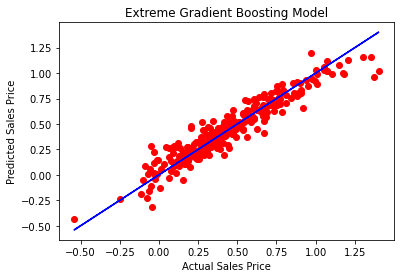

In [65]:
plt.scatter(x=yvalid,y=p,color='r')
plt.plot(yvalid,yvalid,color='b')
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')
plt.title('Extreme Gradient Boosting Model')

### Saving the Model

In [66]:
import joblib
joblib.dump(model,'House_price.obj')

['House_price.obj']

### Predicting the Test Dataset

In [67]:
predictions=model.predict(test)

In [68]:
predictions=pd.DataFrame(predictions,columns=['SalesPrice'])

In [69]:
predictions

SalesPrice
0      1.120516
1      0.742898
2      0.746711
3      0.416196
4      0.568443
5     -0.127844
6      0.341173
7      1.124508
8      0.887030
9      0.376645
10    -0.260182
11     0.411447
12     0.204125
13     0.487908
14     0.916806
15     0.239990
16     0.186889
17     0.141999
18     0.448827
19     0.684122
20     0.349380
21     0.274856
22     0.377721
23    -0.230364
24     0.018406
25     0.251377
26     0.505792
27     0.357410
28     0.462404
29    -0.083469
30     0.291923
31     0.560614
32     0.554462
33     0.450830
34     0.063177
35     0.461554
36     0.500421
37     0.203129
38     0.429842
39     0.332036
40     0.003350
41     1.084747
42     0.542139
43     0.541380
44     0.263806
45     0.320030
46     0.214050
47    -0.045130
48     0.654959
49     0.993144
50     0.391007
51     0.621703
52     0.120661
53    -0.000104
54     0.892666
55     0.211137
56     0.307215
57     0.439967
58     0.139623
59     0.791583
60     0.075922
61     0.497459
62     0.240767
63     0.312610
64     0.614202
65     0.075915
66     0.337514
67     0.563990
68     0.309778
69     0.437510
70     1.057806
71     0.463713
72     0.578256
73     0.385011
74     0.370142
75     0.755487
76     0.981863
77     0.531068
78     0.857996
79     0.382252
80     0.654830
81     0.362537
82     0.244458
83     0.379811
84     0.477513
85     0.852252
86     0.162925
87     1.106654
88     0.381340
89     0.515478
90     0.703266
91     0.145126
92     0.310554
93     0.174293
94     0.504232
95     0.310705
96     0.751977
97     0.397853
98     1.058001
99     0.158203
100    0.825474
101   -0.157989
102    0.221914
103    0.420736
104    0.569830
105    0.307804
106    0.871530
107    0.259232
108    0.516779
109    0.534906
110    0.574795
111    0.493643
112    0.771396
113    0.797356
114    0.255769
115    0.057712
116    0.253231
117    0.599256
118    0.360428
119    0.108011
120    0.013245
121    0.591986
122    0.939760
123    0.260989
124    0.274744
125    0.516981
126    0.220009
127    0.466710
128   -0.129047
129    0.085860
130    0.290280
131    0.676975
132    0.277882
133    0.387503
134    0.528796
135    0.964118
136    0.615303
137    0.105522
138    0.905581
139    0.064282
140    0.297056
141    1.373271
142   -0.052724
143    1.246115
144    0.540021
145    0.709420
146    0.404947
147    0.226456
148    0.133669
149    0.570586
150    0.410359
151    0.310573
152    0.508708
153    0.180523
154   -0.031752
155    0.486956
156    0.547291
157    0.717215
158    0.262218
159    0.485452
160    0.596175
161    0.340930
162    0.594863
163    0.199572
164   -0.050611
165    0.819429
166    0.664687
167    0.505308
168    0.207800
169    0.744447
170    0.388362
171    0.217705
172    0.216771
173    0.842100
174    0.283338
175    1.329307
176    0.257842
177    0.132937
178    0.346918
179    0.379927
180    0.531605
181    0.366999
182    0.848559
183    0.451464
184    1.584880
185    1.161286
186    0.600220
187   -0.016392
188    0.387730
189    0.292707
190    0.138804
191    0.640067
192    0.517742
193   -0.056388
194    0.297400
195   -0.247692
196    0.386725
197    0.565069
198    0.162152
199    0.458436
200    0.312038
201    0.015991
202    0.927312
203    0.922452
204    0.209781
205    0.181386
206    0.819728
207    0.355434
208    0.222811
209    0.247196
210    0.045941
211    0.382887
212    0.380488
213    0.548482
214    0.036524
215    0.602318
216    0.368131
217    0.283533
218    0.231195
219    0.444422
220    0.679104
221    0.686075
222    0.831864
223    0.257248
224    0.487493
225    1.102299
226    0.744062
227   -0.221445
228    1.222415
229    0.472999
230    0.131791
231    0.412713
232   -0.057325
233    0.316103
234    0.039484
235    0.742132
236    0.478713
237    0.467987
238    1.016973
239    0.501823
240    0.731190
241    0.329789
242    0.992126
243   -0.021526
244    0.346879
245    0.648891
246    0.562896
247    1.019977
248    0.336453
249  

In [70]:
predictions.to_csv('test_predictions.csv')